In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

df = pd.read_csv('/content/Mall_Customers.csv',index_col='CustomerID')
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
df[df['Age']>60].shape[0]/df.shape[0]*100

8.5

In [ ]:
df['Gender']=pd.get_dummies(df['Gender'])

In [ ]:
df
# 0-male, 1-Female

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40
...,...,...,...,...
196,1,35,120,79
197,1,45,126,28
198,0,32,126,74


In [ ]:

df['Spending Score (1-100)'].mean()

50.2

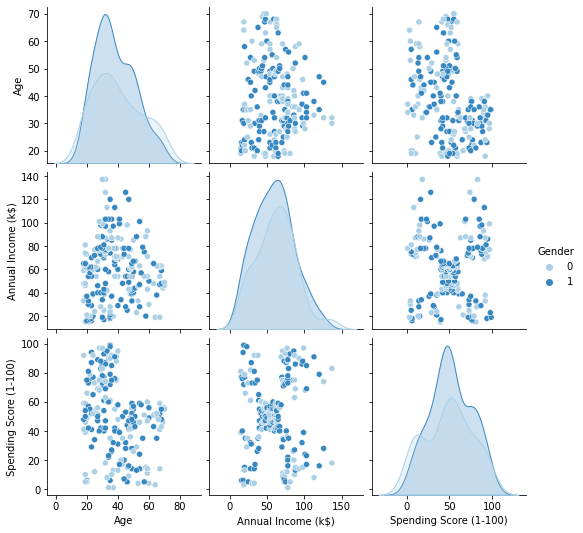

In [ ]:
sns.pairplot(df,hue='Gender',palette= 'Blues')

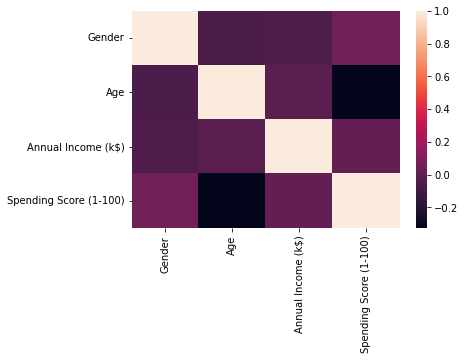

In [ ]:
sns.heatmap(df.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


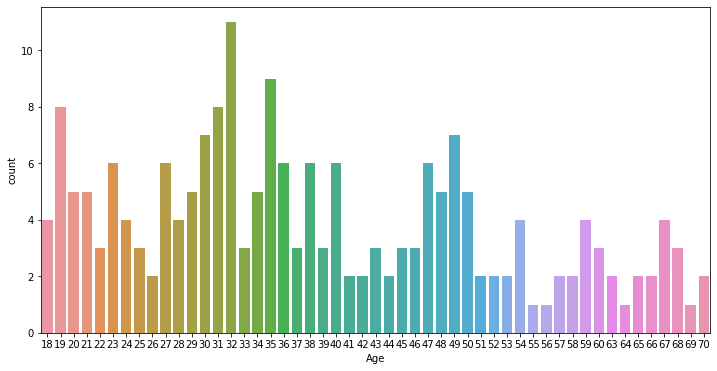

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


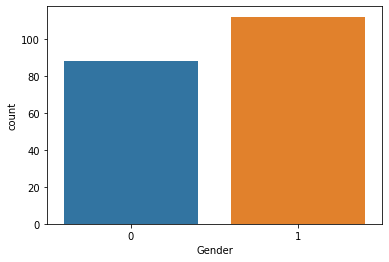

In [ ]:
sns.countplot(df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


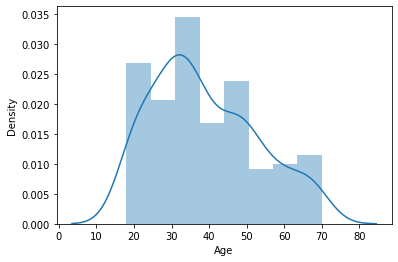

In [ ]:
sns.distplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


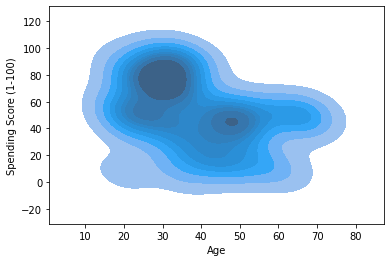

In [ ]:

sns.kdeplot('Age','Spending Score (1-100)',shade = 'fill',data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


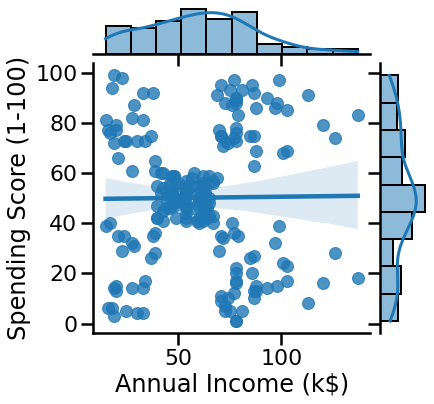

In [ ]:
sns.set_context('poster',font_scale=1)

sns.jointplot('Annual Income (k$)','Spending Score (1-100)',data = df,kind = 'reg')

In [ ]:
kmean_scores = []
for i in range(2,11):
  model = KMeans(n_clusters=i)
  model.fit_predict(df) 
  kmean_scores.append(silhouette_score(df,model.labels_))
x_axis = [x for x in range(2,11)]
kmean_scores

[0.29307334005502633,
 0.383798873822341,
 0.4052954330641215,
 0.44482259384548795,
 0.45205475380756527,
 0.4409411333609709,
 0.427541566977401,
 0.3846704810869784,
 0.38002849865056265]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


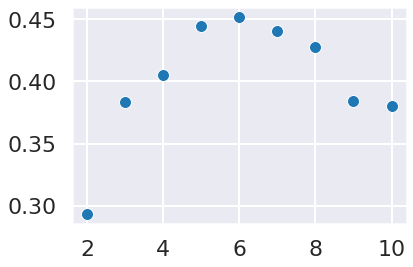

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(x_axis,kmean_scores)

In [ ]:
agglo_scores = []
for i in range(2,11):
  model = AgglomerativeClustering(n_clusters = i)
  y =  model.fit_predict(df)
  agglo_scores.append(silhouette_score(df,y))
agglo_scores

[0.29916602844367,
 0.3812859576468096,
 0.4102091359195185,
 0.43997527212476695,
 0.4428008535928764,
 0.42593881050851595,
 0.4223297424559345,
 0.37773214836148283,
 0.3612629591916317]

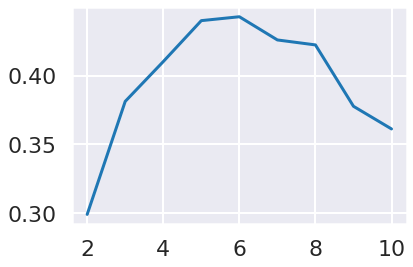

In [ ]:
plt.plot(x_axis,agglo_scores)

In [ ]:
dbscan_score = []
for i in range(11,20):
  model_dbscan = DBSCAN(eps=i,min_samples = 2)
  y_dbscan = model_dbscan.fit_predict(df)
  dbscan_score.append(silhouette_score(df,y_dbscan))
dbscan_score

[0.07747245359486282,
 0.08656096770197945,
 0.01806483728401882,
 0.21265289538202517,
 0.2548540886299427,
 0.30440237856418906,
 0.30440237856418906,
 0.39036425615520437,
 0.39036425615520437]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


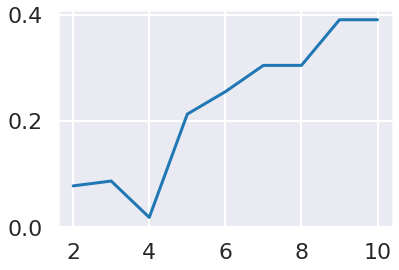

In [ ]:
sns.lineplot(x_axis,dbscan_score)

In [ ]:
final_model = KMeans(n_clusters = 6)
Y = final_model.fit_predict(df)
df['results']=Y
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),results
CustomerID,,,,,
1,0,19,15,39,4
2,0,21,15,81,5
3,1,20,16,6,4
4,1,23,16,77,5
5,1,31,17,40,4
...,...,...,...,...,...
196,1,35,120,79,2
197,1,45,126,28,3
198,0,32,126,74,2
